In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [30]:
dataset = pd.read_csv('/content/students.csv')
X = dataset.iloc[:, [2, 4]].values

In [31]:
dataset.head()

,StudentID,Name,Age,Email,Department,GPA,GraduationYear
0,3336,David Palmer,19,sean43@hotmail.com,Mathematics,3.16,2026
1,8774,Andrew Roach,23,vbecker@harvey.com,Chemistry,3.75,2027
2,1396,Jonathan Gonzalez,22,hollydavis@gmail.com,Physics,2.95,2027
3,6716,Kenneth Morrow,24,ganderson@wheeler-atkins.info,Physics,3.55,2029
4,8830,Kaitlyn Martinez,18,hayesdiane@gmail.com,Chemistry,2.29,2025


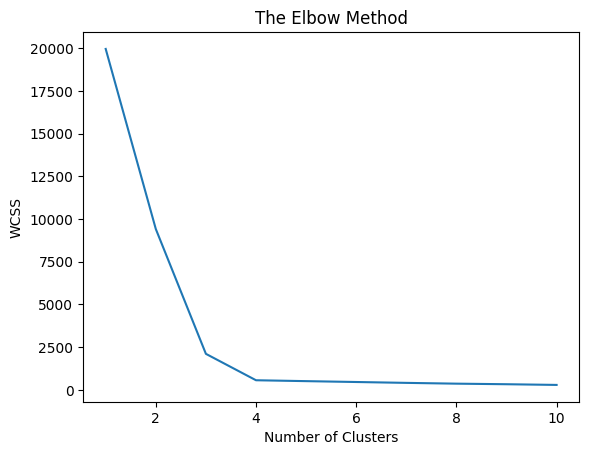

In [32]:

# Membuat dataset buatan untuk clustering (jika X belum didefinisikan)
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Inisialisasi list untuk menyimpan nilai WCSS (Within-Cluster Sum of Squares)
wcss = []

# Melakukan loop untuk mencari jumlah cluster yang optimal (1 hingga 10)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Menyimpan nilai inertia (WCSS)

# Menampilkan grafik Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [33]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)


KMeans digunakan untuk mengelompokkan data ke dalam klaster yang lebih homogen berdasarkan fitur yang diberikan.

n_clusters=5 menentukan bahwa model akan mencari 5 klaster.

init='k-means++' membantu memilih pusat klaster awal yang lebih baik untuk konvergensi yang lebih cepat dan lebih stabil.

fit_predict(X) melatih model dan langsung mengklaster data dalam X, menghasilkan label klaster yang dapat digunakan untuk analisis lebih lanjut.

In [34]:
print(y_kmeans)

[3 3 0 1 3 1 4 1 0 4 0 2 0 0 3 0 3 4 0 0 2 0 1 3 0 3 3 1 1 4 0 4 3 2 3 0 3
 1 3 1 2 0 3 1 0 0 3 4 3 2 1 3 1 0 1 4 3 2 4 0 3 2 2 0 1 1 1 1 1 0 1 1 3 2
 0 3 1 1 0 1 0 0 3 0 1 3 3 2 2 4 3 0 3 0 0 3 1 0 3 3 4 4 4 0 0 0 0 0 1 3 2
 0 0 0 0 2 3 1 3 1 1 1 0 3 1 3 3 0 3 1 2 0 0 0 0 4 2 3 0 1 0 4 1 0 4 4 2 4
 1 0 0 3 2 1 0 4 1 3 3 4 0 3 1 3 2 3 1 0 0 0 0 0 1 4 4 1 1 4 2 1 3 0 3 2 4
 3 1 0 4 4 1 1 1 3 4 1 1 2 4 3 0 0 1 4 0 1 1 3 1 0 0 1 1 4 3 1 3 3 0 3 3 1
 3 1 4 4 3 3 4 4 4 3 0 1 2 1 3 4 3 3 3 1 1 2 3 1 1 1 3 1 3 1 3 2 1 3 4 0 3
 0 4 0 3 0 1 4 1 2 2 0 0 1 4 4 3 3 1 0 0 4 4 4 2 1 3 2 1 2 4 1 0 1 2 0 3 0
 4 0 3 3]


Array tersebut adalah hasil dari proses klastering menggunakan algoritma K-Means, yang menunjukkan klaster mana setiap data termasuk.

Label klaster mengindikasikan pengelompokkan data berdasarkan kedekatannya dengan pusat klaster yang dihitung oleh K-Means.

Anda bisa menggunakan label ini untuk melakukan analisis lebih lanjut terhadap kelompok-kelompok data yang serupa.

   StudentID               Name  Age                          Email  \
0       3336       David Palmer   19             sean43@hotmail.com   
1       8774       Andrew Roach   23             vbecker@harvey.com   
2       1396  Jonathan Gonzalez   22           hollydavis@gmail.com   
3       6716     Kenneth Morrow   24  ganderson@wheeler-atkins.info   
4       8830   Kaitlyn Martinez   18           hayesdiane@gmail.com   

    Department   GPA  GraduationYear  Cluster  
0  Mathematics  3.16            2026        2  
1    Chemistry  3.75            2027        0  
2      Physics  2.95            2027        2  
3      Physics  3.55            2029        0  
4    Chemistry  2.29            2025        1  
                Name   GPA  Cluster
0       David Palmer  3.16        2
1       Andrew Roach  3.75        0
2  Jonathan Gonzalez  2.95        2
3     Kenneth Morrow  3.55        0
4   Kaitlyn Martinez  2.29        1


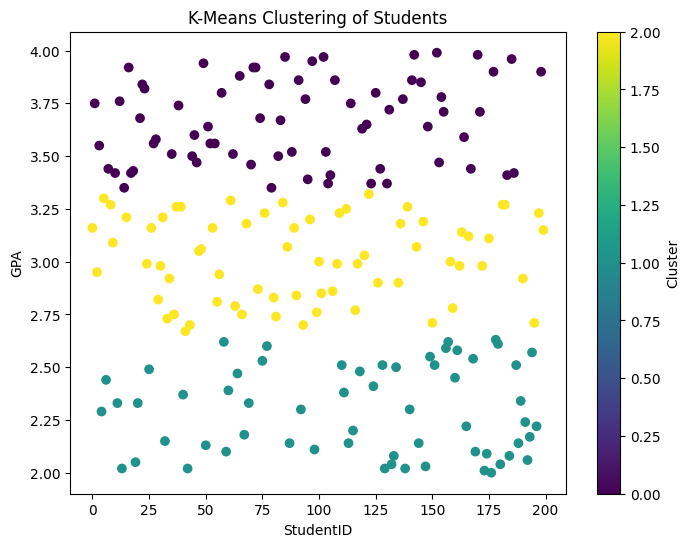

In [35]:
#. Melihat beberapa baris pertama dataset
print(df.head())

#. Menentukan fitur yang digunakan untuk klastering
# Misalnya, kita ingin menggunakan kolom seperti 'Age', 'Score', atau kolom numerik lainnya
# Sesuaikan dengan kolom yang ada di dataset Anda
# Using only numerical feature 'GPA' for clustering
features = df[['GPA']]  # Changed to only include GPA

#. Standarisasi data (opsional tetapi disarankan untuk K-Means)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

#. Melakukan klastering dengan K-Means
kmeans = KMeans(n_clusters=3, random_state=42)  # Gantilah n_clusters sesuai kebutuhan
kmeans.fit(scaled_features)

#. Menambahkan hasil klaster ke dataframe
df['Cluster'] = kmeans.labels_

#. Melihat hasil klastering
print(df[['Name', 'GPA', 'Cluster']].head())

#. Visualisasi klastering
plt.figure(figsize=(8, 6))
# Using StudentID instead of Name for visualization
plt.scatter(df.index, df['GPA'], c=df['Cluster'], cmap='viridis') # Changed to use df.index
plt.xlabel('StudentID') # Changed x-axis label
plt.ylabel('GPA')
plt.title('K-Means Clustering of Students')
plt.colorbar(label='Cluster')
plt.show()

Grafik di atas menunjukkan hasil clustering data menggunakan algoritma K-Means, yang diterapkan pada sekumpulan data siswa berdasarkan StudentID (nomor identifikasi siswa) dan GPA (indeks prestasi kumulatif). Penjelasan rinci sebagai berikut:

1. Sumbu X dan Y:
Sumbu X (StudentID): Mewakili identifikasi unik untuk setiap siswa (bernomor dari 0 hingga 200).
Sumbu Y (GPA): Menunjukkan nilai rata-rata GPA siswa, berkisar antara 2,0 hingga 4,0.
2. Clustering:
Warna pada titik-titik di grafik menunjukkan cluster atau kelompok hasil dari K-Means. Warna yang berbeda (ungu, kuning, biru) menunjukkan siswa yang tergolong dalam cluster tertentu.
Berdasarkan grafik ini, terdapat tiga cluster, yang dilabeli sebagai:
Cluster 0 (biru): Siswa dengan GPA lebih rendah (sekitar 2,0 - 2,75).
Cluster 1 (kuning): Siswa dengan GPA menengah (sekitar 2,75 - 3,25).
Cluster 2 (ungu): Siswa dengan GPA lebih tinggi (sekitar 3,25 - 4,0).
3. Tujuan Clustering:
K-Means clustering membantu mengelompokkan siswa berdasarkan karakteristik GPA mereka. Dengan cara ini, dapat diidentifikasi pola seperti:

Kelompok siswa berprestasi tinggi (Cluster 2).
Kelompok siswa dengan performa akademik sedang (Cluster 1).
Kelompok siswa yang memerlukan lebih banyak perhatian (Cluster 0).
4. Warna:
Bar warna di sebelah kanan (color bar) menunjukkan nilai cluster. Nilai ini diskret (0, 1, 2), sesuai dengan cluster masing-masing siswa.
5. Penggunaan Data:
Visualisasi seperti ini dapat membantu pendidik atau institusi pendidikan dalam memahami distribusi GPA siswa dan mengembangkan strategi yang sesuai untuk mendukung kelompok siswa tertentu, seperti menyediakan bimbingan tambahan untuk Cluster 0.